From the [Australian Bureau of Statistics](https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/main-structure-and-greater-capital-city-statistical-areas/statistical-area-level-1):

Statistical Areas Level 1 (SA1s) are geographic areas built from whole Mesh Blocks. Whole SA1s aggregate to form Statistical Areas Level 2 (SA2s). SA1s are designed to maximise the geographic detail available for Census of Population and Housing data. However, limited Census of Population and Housing data may also be available at the Mesh Block level for ASGS Edition 3.

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import descartes    
import geopandas as gpd
from shapely.geometry import Point, Polygon

filepath = os.path.abspath('')
utilpath = f'{filepath}/../util/'
sys.path.append(utilpath)
data_dir = f'{filepath}/../data'

# time intense
melbourne_sua = gpd.read_file(f'{data_dir}/prepared/geometry_melbourne_sua.shp')
melbourne_gcc = gpd.read_file(f'{data_dir}/prepared/geometry_melbourne_gcc.shp')

melb_data = pd.read_hdf(f'{data_dir}/melb_data.h5')
melb_data['Car'] = melb_data['Car'].astype(pd.Int64Dtype())
melb_data['YearBuilt'] = melb_data['YearBuilt'].astype(pd.Int64Dtype())

from melbourne import Melbourne

melbourne = Melbourne(melb_data, frac=1)

In [2]:
melbourne.raw_df[melbourne.numerical_features].head(10)

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount
9871,2,7.5,2,2,2,1523.0,NaN,2013,-37.74999,144.91447,9264
13097,3,6.3,3,1,<NA>,230.0,115.0,1900,-37.86275,145.02364,4836
7638,3,5.9,3,1,2,465.0,NaN,<NA>,-37.75720,144.94860,7082
9609,3,7.3,3,2,4,677.0,NaN,<NA>,-37.79210,145.05070,2671
11239,4,17.2,4,2,0,539.0,192.0,1978,-37.83459,145.21264,4181
3130,1,4.6,1,1,1,0.0,52.0,1970,-37.81770,145.04240,11308
2812,5,9.2,5,4,4,802.0,206.0,2013,-37.86270,145.07190,10412
2546,2,1.6,2,1,1,157.0,110.0,1900,-37.79410,144.98000,5825
3170,2,4.6,2,1,1,1099.0,72.0,1965,-37.82710,145.03470,11308
10038,4,23.5,4,2,0,725.0,196.0,1985,-37.90880,145.26319,11667


In [3]:
melbourne.raw_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Latitude,Longitude,Propertycount,Month
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.0,13580.000000,7130.000000,8205.0,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378,7.052283
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772,2.536034
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.0,0.000000,0.000000,1196.0,-38.182550,144.431810,249.000000,1.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.0,177.000000,93.000000,1940.0,-37.856822,144.929600,4380.000000,5.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.0,440.000000,126.000000,1970.0,-37.802355,145.000100,6555.000000,7.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.0,651.000000,174.000000,1999.0,-37.756400,145.058305,10331.000000,9.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.0,433014.000000,44515.000000,2018.0,-37.408530,145.526350,21650.000000,12.000000


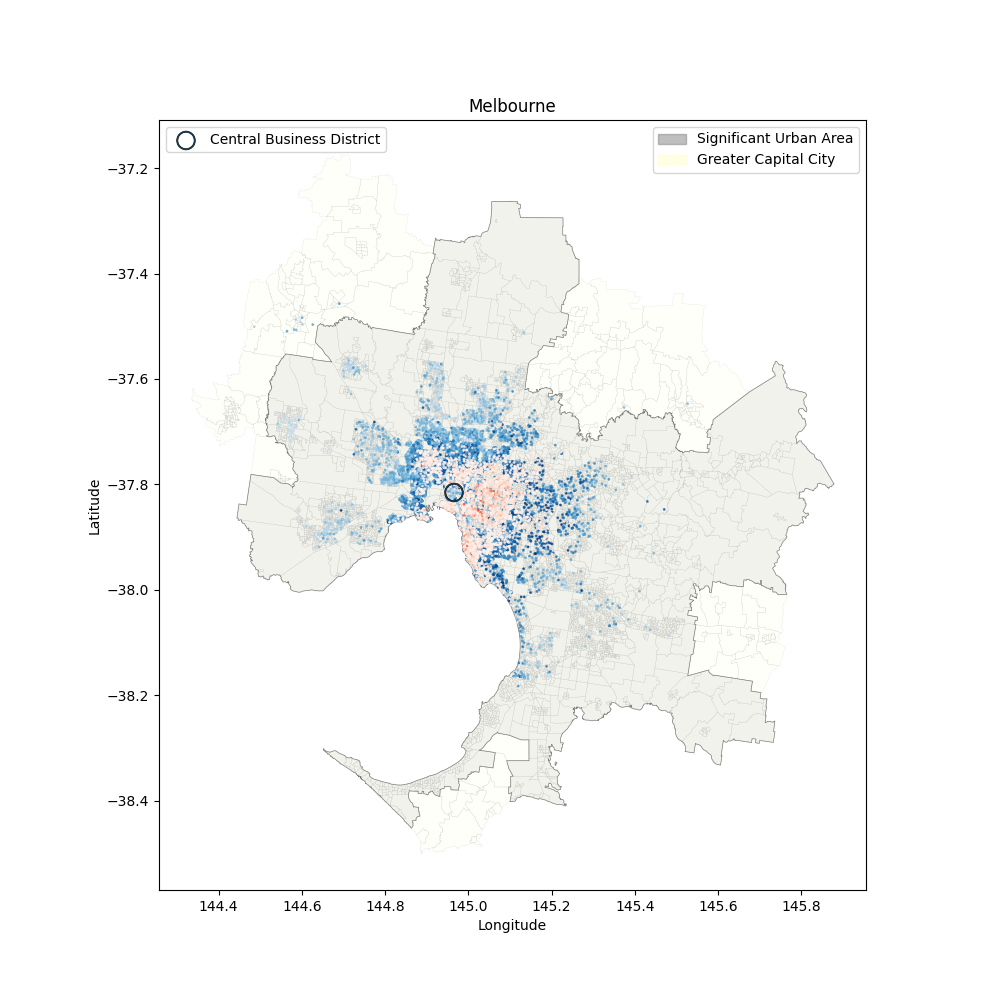

In [4]:
%matplotlib widget

import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 10))

ax.set(
    title='Melbourne',
    xlabel='Longitude',
    ylabel='Latitude'
)
melbourne_sua.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=.5, alpha=.5)
melbourne_sua.plot(ax=ax, facecolor='grey', edgecolor='none', alpha=.1)

melbourne_gcc.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=.1, alpha=.5)
melbourne_gcc.plot(ax=ax, facecolor='yellow', edgecolor='none', alpha=.025)

melbourne_proxy_handles = [
    mpatches.Patch(color='grey', alpha=.5, label='Significant Urban Area'),
    mpatches.Patch(color='yellow', alpha=.1, label='Greater Capital City'),
]
legend_shape = ax.legend(handles=melbourne_proxy_handles, loc='upper right')
ax.add_artist(legend_shape)

# Discriminate between cheap and expensive houses
melbourne_cheap, melbourne_expensive = melbourne.split_q(q=.75)

ax.scatter(
    melbourne_cheap.raw_df['Longitude'], melbourne_cheap.raw_df['Latitude'],
    s=1, 
    c=melbourne_cheap.prices_01, 
    cmap=plt.get_cmap('Blues'),
    alpha=.75
)
ax.scatter(
    melbourne_expensive.raw_df['Longitude'], melbourne_expensive.raw_df['Latitude'],
    s=.75, 
    c=melbourne_expensive.prices_01, 
    cmap=plt.get_cmap('Reds'),
    alpha=.75
)
# Melbourne Central Business District (CBD)
ax.scatter(
    [melbourne.cbd_long], [melbourne.cbd_lat],
    s=200,
    marker='$\u25EF$',
    edgecolors='black',
    lw=.5,
    label='Central Business District'
)
ax.legend(loc='upper left')


plt.show()
# fig.canvas.draw()